In [1]:
import numpy as np
import pyFDS
import matplotlib.pyplot as plt

# Sine and Sine Sweep

## SpecificationDevelopment object

Specification development object contains data, required for the calculation of extreme response spectrum (ERS) and fatigue damage spectrum (FDS). It enables calculation for sine and sine-sweep signals.

### Instantiate Class

Class is instantiated with inputs:
- `freq_data`: tuple containing (f0_start, f0_stop, f0_step) [Hz] or a frequency vector, defining the range where the ERS and FDS will be calculated
-  damping ratio `damp` or damping Q-factor `Q`

In [10]:
sd1 = pyFDS.SpecificationDevelopment(freq_data=(0,2000,5), damp=0.1) #sine

sd2 = pyFDS.SpecificationDevelopment(freq_data=(0,2000,5), damp=0.1) #sine sweep

### Set load

Random load is defined with the `set_sine_load` and `set_sine_sweep_load` methods

In [11]:
sd1.set_sine_load(sine_freq=500,amp=10,t_total=3600) # t_total is only needed for fds calculation

In [12]:
sd2.set_sine_sweep_load(const_amp=[5,10,20], const_f_range=[20,100,500,1000],exc_type='acc', sweep_type='log', sweep_rate=1)

### Get ERS and FDS

ERS and FDS spectra are calculated:

In [13]:
sd1.get_ers()
sd2.get_ers()

In [14]:
# 'get_fds' method requires material fatigue parameters

sd1.get_fds(b=5,C=1,K=1)
sd2.get_fds(b=5,C=1,K=1)

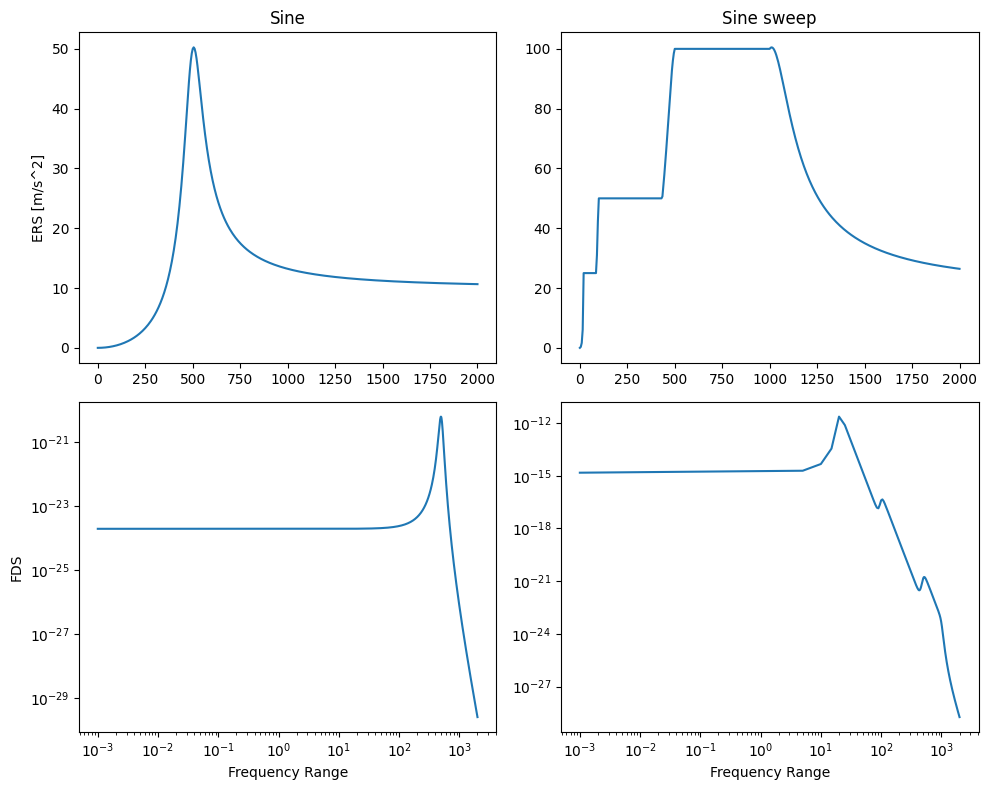

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot sd1 data
axs[0, 0].plot(sd1.f0_range, sd1.ers)
axs[0, 0].set_title('Sine')
axs[0, 0].set_ylabel('ERS [m/s^2]')

axs[1, 0].loglog(sd1.f0_range, sd1.fds)
axs[1, 0].set_ylabel('FDS')
axs[1, 0].set_xlabel('Frequency Range')

# Plot sd2 data
axs[0, 1].plot(sd2.f0_range, sd2.ers)
axs[0, 1].set_title('Sine sweep')

axs[1, 1].loglog(sd2.f0_range, sd2.fds)
axs[1, 1].set_xlabel('Frequency Range')

plt.tight_layout()
plt.show()